In [83]:
import requests

import io

import pandas as pd

import matplotlib.pyplot as plt

In [85]:
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

# Data Acquisition
Load it directly from URL

In [6]:
resp = requests.get('http://curtis.ml.cmu.edu/datasets/hotpot/hotpot_train_v1.1.json')

data_json = resp.json()

**Optional but Recomended**: Save the dataset to disk (Downloading 500 mb every time you run this will get tedious)

In [154]:
import json

with open('Data/hotpot_train_v1.1.json', mode='w+') as json_file:
    json.dump(data_json, json_file)

In [8]:
len(data_json)

90447

In [16]:
df = pd.DataFrame.from_records(data_json)

In [18]:
df.columns

Index(['supporting_facts', 'level', 'question', 'context', 'answer', '_id',
       'type'],
      dtype='object')

# EDA
## `level`

In [88]:
df.level.unique()

array(['medium', 'hard', 'easy'], dtype=object)

<AxesSubplot:xlabel='level'>

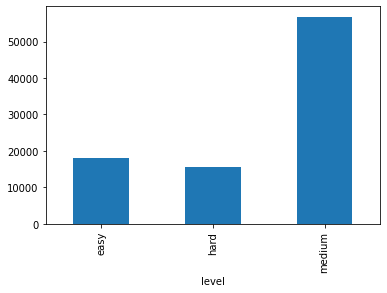

In [89]:
df.groupby('level')['_id'].count().plot.bar()

## `type`

In [19]:
df.type.unique()

array(['comparison', 'bridge'], dtype=object)

<AxesSubplot:xlabel='type'>

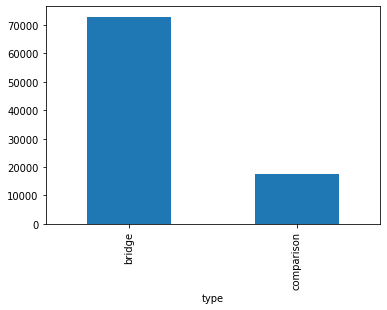

In [87]:
# fig=plt.Figure(figsize=(14,5))
# ax = fig.add_subplot(111)
df.groupby('type')['_id'].count().plot.bar()

Let's have a quick look at each `type` of question

### `Comparison` Type Questions

In [74]:
sample_question = df[df.type=='comparison'].sample()

In [75]:
sample_question.question.values

array(['Liberty University and University of Waterloo are both what?'],
      dtype=object)

In [76]:
sample_question.level.values

array(['medium'], dtype=object)

In [77]:
sample_question.context.values[0]

[['Scott Jackson (baseball)',
  ['Scott Jackson is an American baseball coach, currently serving as the head baseball coach at Liberty University.',
   ' Jackson attended college at Campbell University and played on the Campbell Fighting Camels baseball team.',
   ' Jackson served as an assistant baseball coach and recruiting coordinator at the University of North Carolina at Chapel Hill from 2009 to 2016.',
   ' Jackson was named head baseball coach at Liberty University on July 17, 2016.']],
 ['University of Waterloo',
  ['The University of Waterloo (commonly referred to as Waterloo, UW or UWaterloo) is a public research university with a main campus in Waterloo, Ontario.',
   ' The main campus is on 404 ha of land in "Uptown" Waterloo, adjacent to Waterloo Park.',
   ' The university offers academic programs administered by six faculties and ten faculty-based schools.',
   ' The university also operates four satellite campuses and four affiliated university colleges.',
   ' Waterloo

In [78]:
sample_question.answer

71598    research university
Name: answer, dtype: object

In [32]:
sample_question.supporting_facts.values

array([list([['University of Alabama in Huntsville', 0], ['Kasetsart University', 0]])],
      dtype=object)

### `Bridge` Type Questions

In [155]:
sample_question = df[(df.type=='bridge') & (df.level=='easy')].sample()

sample_question.question.values

array(['Toni Lopopolo is a literary agent whose book publishing career began in 1970 in the publicity department of Bantam Books, where she helped publicize authors such as which English author of romance novels, one of the best-selling authors as well as one of the most prolific and commercially successful worldwide of the twentieth century, with her 723 novels were translated into 38 languages and she continues to be referenced in the "Guinness World Records" for the most novels published in a single year in 1976?'],
      dtype=object)

In [157]:
sample_question.level.values

array(['easy'], dtype=object)

In [158]:
sample_question.context.values[0][1]

["Indiana Jones and the Philosopher's Stone",
 ["Indiana Jones and the Philosopher's Stone is the ninth of 12 Indiana Jones novels published by Bantam Books.",
  ' Max McCoy, the author of this book, also wrote three of the other Indiana Jones books for Bantam.',
  ' Published on April 1, 1995, it is preceded by "Indiana Jones and the White Witch" and followed by "Indiana Jones and the Dinosaur Eggs".']]

In [159]:
sample_question.context.values[0]

[['Transworld Publishers',
  ["Transworld Publishers Inc. is a British publishing division of Random House and belongs to Bertelsmann, one of the world's largest media groups.",
   ' It was established in 1950, and for many years it was the British division of Bantam Books.',
   ' It publishes fiction and non fiction titles by various best-selling authors including Val Wood under several different imprints. Hardbacks are either published under the Doubleday or the Bantam Press imprint, whereas paperbacks are published under the Black Swan, Bantam or Corgi imprint.']],
 ["Indiana Jones and the Philosopher's Stone",
  ["Indiana Jones and the Philosopher's Stone is the ninth of 12 Indiana Jones novels published by Bantam Books.",
   ' Max McCoy, the author of this book, also wrote three of the other Indiana Jones books for Bantam.',
   ' Published on April 1, 1995, it is preceded by "Indiana Jones and the White Witch" and followed by "Indiana Jones and the Dinosaur Eggs".']],
 ['Barbara C

In [160]:
sample_question.answer

87923    Barbara Cartland
Name: answer, dtype: object

In [161]:
sample_question.supporting_facts.values[0]

[['Toni Lopopolo', 0], ['Barbara Cartland', 0]]

### Types and Levels

<AxesSubplot:xlabel='type,level'>

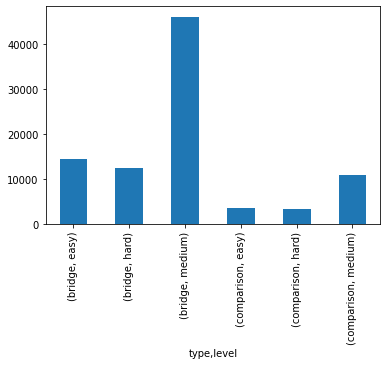

In [98]:
df.groupby(['type', 'level'])['_id'].count().rename({'_id': 'count'}, axis=1).plot.bar()

## `supporting_facts`

In [109]:
df['num_supporting_facts'] = df.supporting_facts.map(lambda x: len(x))

In [115]:
df['num_supporting_facts'].describe()

count    90447.000000
mean         2.384645
std          0.672890
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: num_supporting_facts, dtype: float64

<AxesSubplot:xlabel='num_supporting_facts'>

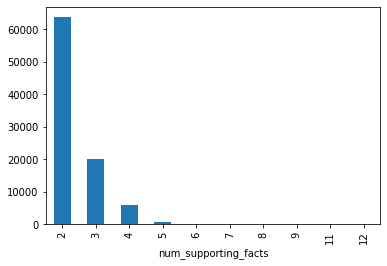

In [113]:
df.groupby('num_supporting_facts')['supporting_facts'].count().plot(kind='bar')

## First Words

In [129]:
first_word = df.answer.str.split(' ').map(lambda x: ' '.join(x[:3]))

In [141]:
first_word[df.type!='bridge'].sample(10)

37823    Corrosion of Conformity
87640          Touching the Void
15770       The Border Surrender
67813                        yes
4957                         yes
15289                Spike Jonze
10930                        yes
51748                      films
22670      El Paso International
52910                     writer
Name: answer, dtype: object

## Yes or No Questions

In [146]:
yes_no_ques_idx = (df.answer.str.startswith('yes')) | (df.answer.str.startswith('no'))

In [147]:
df[yes_no_ques_idx].groupby('type')['type'].count()

type
bridge          58
comparison    5528
Name: type, dtype: int64

In [148]:
df[yes_no_ques_idx].groupby(['type', 'level'])['type'].count()

type        level 
bridge      easy        12
            hard        24
            medium      22
comparison  easy       533
            hard      1034
            medium    3961
Name: type, dtype: int64

In [149]:
df.shape[0]

90447

# Tokenizer Tests

In [162]:
import sentencepiece as spm

In [180]:
import numpy as np

In [163]:
sp = spm.SentencePieceProcessor(model_file='Models/Tokenizer/bnc_2048_bpe.model', nbest_size=-2)

In [164]:
sp.encode('Hello'.lower(), out_type=str)

['▁hel', 'lo']

In [173]:
sp.vocab_size()

2048

In [ ]:
np.apply_along_axis()

In [192]:
sp.encode(sample_question.question.str.lower().tolist(), out_type=str)

[['▁ton',
  'i',
  '▁lo',
  'p',
  'op',
  'o',
  'lo',
  '▁is',
  '▁a',
  '▁li',
  'ter',
  'ary',
  '▁ag',
  'ent',
  '▁wh',
  'ose',
  '▁book',
  '▁p',
  'ublish',
  'ing',
  '▁care',
  'er',
  '▁be',
  'gan',
  '▁in',
  '▁',
  '1970',
  '▁in',
  '▁the',
  '▁p',
  'ub',
  'lic',
  'ity',
  '▁de',
  'part',
  'ment',
  '▁o',
  'f',
  '▁b',
  'ant',
  'am',
  '▁book',
  's',
  ',',
  '▁wh',
  'ere',
  '▁sh',
  'e',
  '▁help',
  'ed',
  '▁p',
  'ub',
  'lic',
  'ize',
  '▁auth',
  'ors',
  '▁su',
  'ch',
  '▁as',
  '▁wh',
  'ic',
  'h',
  '▁english',
  '▁author',
  '▁o',
  'f',
  '▁ro',
  'm',
  'ance',
  '▁no',
  'vel',
  's',
  ',',
  '▁',
  'one',
  '▁o',
  'f',
  '▁the',
  '▁b',
  'est',
  '-',
  's',
  'elling',
  '▁auth',
  'ors',
  '▁as',
  '▁w',
  'ell',
  '▁as',
  '▁',
  'one',
  '▁o',
  'f',
  '▁the',
  '▁m',
  'os',
  't',
  '▁pro',
  'li',
  'fic',
  '▁',
  'and',
  '▁commerci',
  'ally',
  '▁su',
  'ccess',
  'ful',
  '▁wor',
  'ld',
  'w',
  'ide',
  '▁o',
  'f',
  '▁the'

# Prod Test Questions:
- What is the butlerian jihad?
- What is the Sasser Cup?
  - Which teams have won it more than 10 times?
- How many Indiana Jones novels are there?
    - How many were published by Bantam Books?
    - What is the best one?